# 💉💉💉💉💉💉💉💉 _Vaccination Coverage in Brazil_ 💉💉💉💉💉💉💉💉
---

# Introduction

<br>
<br>

This notebook is a brief analysis of **Vaccination Coverage in Brazil**. The data was gotten on November 30th from [Tabnet Datasus](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def), a government website that makes available information on the health system of Brazil. The information selected is from 2009 to 2019, however, most of the focus of the analysis was from 2014 to 2019.

This project was proposed by **[Alura Bootcamp](https://www.alura.com.br/bootcamp/data-science-aplicada/matriculas-abertas) Module2**. Here I'll use **Pandas**, **Numpy**, **Seaborn**, and **Matplotlib** libraries to analyze the data.

_Aluna: Gabriela Oliveira da Trindade_

<br>

## Goals:
---

- General
    - Analyse the vaccination coverage for each vaccine in the last 6 years.
    - Analyse the vaccination coverage per state and region in the last 6 years.
    - Analyse the vaccination coverage for each vaccine in states of Brazil.
    

- Specifics
    - Check which vaccine has the highest and lowest coverage.
    - Check which state has the highest and lowest vaccination coverage.
    - Try to find out if there are some consequences for low vaccination coverage.

<br>

## Summary:
---
- The two first steps are to import libraries that I'll use and then load the dataset into a dataframe.
- After that, an initial exploratory data analysis is made. The goal here is to understand the data and check its quality. Some investigation is done to understand the values and what they represent, as well as checking whether the feature values make sense. Many insights from the data are obtained in this section. Some actions are defined for the next section (Data Cleaning).
- Data cleaning is the next step. After verifying the quality of the data, I'll clear incorrect values and columns names.
- With all data clean it's time to  select the relevant features and filter the observations (vaccines and period of time). 
- So the creation of new a feature is done. It can help in the final analysis.
- Thus, it's time for the analysis.
- With the analysis, some insights were gotten. Then we contine with a deeper analysis to investigate them.



<br>
<br>

---

# Table of Contents

1. [Importing Libraries](#1.-Importing-Libraries)


2. [Getting the data](#2.-Getting-the-data)


3. [Initial Exploratory Data Analysis](#3.-Initial-Exploratory-Data-Analysis) <br>
	3.1 [vaccination_coverage_per_year](#3.1-vaccination_coverage_per_year) <br>
	3.2 [state_vaccination_coverage_per_year](#3.2-state_vaccination_coverage_per_year) <br>
	3.3 [vaccination_coverage_per_state](#3.3-vaccination_coverage_per_state) <br>
	3.4 [Initial Exploratory Data Analysis Conclusions](#3.4-Initial-Exploratory-Data-Analysis-Conclusions)
    
    
4. [Data Cleaning](#4.-Data-Cleaning) <br>
    4.0 [functions](#4.0-functions) <br>
	4.1 [vaccination_coverage_per_year](#4.1-vaccination_coverage_per_year) <br>
&emsp;&emsp;4.1.1 [Exchange "..." and "-" to NaN values](#4.1.1-Exchange-"..."-and-"-"-to-NaN-values) <br>
&emsp;&emsp;4.1.2 [Convert the type of vaccination coverage value from string to float](#4.1.2-Convert-the-type-of-vaccination-coverage-value-from-string-to-float) <br>
&emsp;&emsp;4.1.3 [Clean column names](#4.1.3-Clean-column-names) <br>
	4.2 [state_vaccination_coverage_per_year](#4.2-state_vaccination_coverage_per_year) <br>
&emsp;&emsp;4.2.1 [Clean column names](#4.2.1-Clean-column-names) <br>
&emsp;&emsp;4.2.2 [Clean state values](#4.2.2-Clean-state-values) <br>
	4.3 [vaccination_coverage_per_state](#4.3-vaccination_coverage_per_state) <br>
&emsp;&emsp;4.3.1 [Clean column names](#4.3.1-Clean-column-names) <br>
&emsp;&emsp;4.3.2 [Clean state values](#4.3.2-Clean-state-values) <br>
	4.4 [Data Cleaning Conclusion](#4.4-Data-Cleaning-Conclusion) <br>
    
    
5. [Feature Selection and Filtering](#5.-Feature-Selection-and-Filtering) <br>
	5.1 [Filtering from period of time](#5.1-Filtering-from-period-of-time) <br>
	5.2 [Filtering the vaccines](#5.2-Filtering-the-vaccines) <br>
    5.3 [Feature Selection and Filtering Conclusion](#5.3-Feature-Selection-and-Filtering-Conclusion)
    

6. [Feature Engineering](#6.-Feature-Engineering) <br>
	6.0 [functions](#6.0-functions) <br>
	6.1 [Adding region column](#6.1-Adding-region-column) <br>
	6.2 [Feature Engineering Conclusion](#6.2-Feature-Engineering-Conclusion) <br>


7. [Analysis](#7.-Analysis) <br>
	7.1 [Vaccination coverage for each vaccine in the last 6 years](#7.1-Vaccination-coverage-for-each-vaccine-in-the-last-6-years) <br>
	7.2 [Vaccination coverage per state and region in the last 6 years](#7.2-Vaccination-coverage-per-state-and-region-in-the-last-6-years) <br>
	7.3 [Vaccination coverage for each vaccine in states of Brazil](#7.3-Vaccination-coverage-for-each-vaccine-in-states-of-Brazil) <br>
	7.4 [Analysis Conclusion](#7.4-Analysis-Conclusion) <br>

# 1. Importing Libraries

All the necessary libraries are imported in this section.

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 2. Getting the data

Here I'm gonna load the dataset into a dataframe, and then print the first lines to get the first impressions.

---

In [2]:
path = '/home/gabriela/Data Science/bootcamp-alura/module2/project/dataset/'

In [3]:
vaccination_coverage_per_year = \
    pd.read_csv(path+'cobertura_ano_imuno.csv', 
                encoding='ISO-8859-1',
                skiprows=3, sep=';', 
                skipfooter=20, engine='python',
                decimal=',')

vaccination_coverage_per_year.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,2009,108.71,...,85.99,-,100.20,...,...,103.66,...,...,...,103.74,...,...,101.71,...,...,...,...,87.09
1,2010,106.71,...,83.04,26.88,96.08,...,24.02,99.35,...,...,...,99.93,...,...,98.01,...,...,...,...,76.98
2,2011,107.94,...,87.06,105.66,97.71,...,81.65,101.33,...,...,...,102.39,...,...,99.61,...,...,...,...,92.48
3,2012,105.69,...,86.37,96.18,96.67,24.89,88.39,96.55,...,...,...,99.50,...,...,93.81,...,...,...,...,83.73
4,2013,107.42,-,93.52,99.70,100.56,95.89,93.57,100.71,...,...,92.92,107.46,68.87,34.19,97.85,...,90.96,50.73,2.80,73.99


In [4]:
state_vaccination_coverage_per_year = \
    pd.read_csv(path+'cobertura_geral_uf_ano.csv', 
                encoding='ISO-8859-1',
                skiprows=3, sep=';', 
                skipfooter=20, engine='python',
                decimal=',')

state_vaccination_coverage_per_year.tail()

,Unidade da Federação,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
22,43 Rio Grande do Sul,69.20,67.22,81.99,72.95,73.47,84.15,87.69,53.86,72.54,74.94,51.65,70.49
23,50 Mato Grosso do Sul,78.53,75.77,89.37,83.46,81.81,110.11,113.07,63.55,78.81,83.52,52.21,81.36
24,51 Mato Grosso,79.38,73.54,87.40,81.37,75.04,92.61,100.32,58.32,74.28,76.70,46.38,75.25
25,52 Goiás,80.41,76.25,96.24,82.52,79.36,86.63,93.55,53.60,73.25,71.85,47.04,74.62
26,53 Distrito Federal,90.75,80.07,67.70,64.84,85.83,89.33,71.55,75.28,73.82,73.85,49.58,74.80


In [5]:
vaccination_coverage_per_state = \
    pd.read_csv(path+'cobertura_uf_imuno.csv', 
                encoding='ISO-8859-1',
                skiprows=3, sep=';', engine='python',
                skipfooter=20,
                decimal=',')

vaccination_coverage_per_state.tail()

,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
22,43 Rio Grande do Sul,95.39,62.96,84.45,80.56,91.55,79.21,81.51,87.74,0.62,...,75.56,90.89,76.96,64.68,87.76,3.78,69.84,33.09,28.67,74.62
23,50 Mato Grosso do Sul,106.96,82.56,96.01,89.41,100.93,91.44,93.78,100.48,0.47,...,91.55,102.64,79.97,71.36,101.12,3.53,88.90,51.55,39.81,87.60
24,51 Mato Grosso,99.26,75.55,87.34,82.32,94.24,80.73,80.86,93.41,0.75,...,77.47,95.82,75.76,67.21,92.34,3.45,75.70,45.79,34.55,80.23
25,52 Goiás,102.86,62.30,88.18,81.16,93.63,79.35,83.06,92.03,0.21,...,76.20,98.53,74.27,62.76,90.02,4.61,68.30,32.53,35.59,78.36
26,53 Distrito Federal,104.01,92.93,88.12,80.54,93.67,82.50,84.25,92.77,0.12,...,81.38,92.23,89.83,78.40,91.62,4.64,79.50,58.45,41.23,82.04


# 3. Initial Exploratory Data Analysis

The Initial Exploratory Data Analysis has basically 2 main goals: <br>
    - Understanding the dataset
    - Checking the Data Quality
To do it, I'm gonna through each dataset, and their features (columns), check their values and data types. Also, I'll try to understand the meaning of the values. <br>
Besides that, I'm gonna looking for the dataset shape, the missing and wrong values. <br>

So here, you'll find general insights of the data and some future decisions for data cleaning. <br>

---

## 3.1 vaccination_coverage_per_year

In [6]:
vaccination_coverage_per_year.shape

(11, 24)

In [7]:
vaccination_coverage_per_year.columns

Index(['Ano', '072 BCG', '099 Hepatite B  em crianças até 30 dias',
       '061 Rotavírus Humano', '053 Meningococo C', '073 Hepatite B',
       '080 Penta', '012 Pneumocócica', '074 Poliomielite',
       '100 Poliomielite 4 anos', '006 Febre Amarela', '096 Hepatite A',
       '091 Pneumocócica(1º ref)', '092 Meningococo C (1º ref)',
       '093 Poliomielite(1º ref)', '021 Tríplice Viral  D1',
       '098 Tríplice Viral  D2', '097 Tetra Viral(SRC+VZ)', '075 DTP',
       '102 DTP REF (4 e 6 anos)', '095 Tríplice Bacteriana(DTP)(1º ref)',
       '094 Dupla adulto e tríplice acelular gestante', '003 dTpa gestante',
       'Total'],
      dtype='object')

In [8]:
vaccination_coverage_per_year.Ano

0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2017
9     2018
10    2019
Name: Ano, dtype: int64

### vaccination_coverage_per_year

**Insights:**
- We have vaccination coverage information for 23 different types of vaccines - from 2009 to 2019 (11 years).

In [9]:
vaccination_coverage_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano                                            11 non-null     int64  
 1   072 BCG                                        11 non-null     float64
 2   099 Hepatite B  em crianças até 30 dias        11 non-null     object 
 3   061 Rotavírus Humano                           11 non-null     float64
 4   053 Meningococo C                              11 non-null     object 
 5   073 Hepatite B                                 11 non-null     float64
 6   080 Penta                                      11 non-null     object 
 7   012 Pneumocócica                               11 non-null     object 
 8   074 Poliomielite                               11 non-null     float64
 9   100 Poliomielite 4 anos                        11 non-nu

In [10]:
vaccination_coverage_per_year.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,2009,108.71,...,85.99,-,100.20,...,...,103.66,...,...,...,103.74,...,...,101.71,...,...,...,...,87.09
1,2010,106.71,...,83.04,26.88,96.08,...,24.02,99.35,...,...,...,99.93,...,...,98.01,...,...,...,...,76.98
2,2011,107.94,...,87.06,105.66,97.71,...,81.65,101.33,...,...,...,102.39,...,...,99.61,...,...,...,...,92.48
3,2012,105.69,...,86.37,96.18,96.67,24.89,88.39,96.55,...,...,...,99.50,...,...,93.81,...,...,...,...,83.73
4,2013,107.42,-,93.52,99.70,100.56,95.89,93.57,100.71,...,...,92.92,107.46,68.87,34.19,97.85,...,90.96,50.73,2.80,73.99


In [11]:
vaccination_coverage_per_year.isnull().sum().sum()

0

### vaccination_coverage_per_year

**Insights:**
- It seems there is no missing values. However, we can see that the missing values is filled by "..." or "-" string.
- Because of the item above, vaccination coverage for some columns is not a float or an int value.
- Vaccination coverage exceeds 100%.
- Column names have spaces.

**Observation:**
- These values represent vaccination coverage for the target audience. However, some of them exceed 100 - why?? This is because they vaccinated more people than expected. In other words, if all target is vaccinated then vaccination coverage is 100%, and if more people than expected are vaccinated, that number will increase.

**Action:**
- Clean these values ("..." and "-").
- Exchange the type of vaccination coverage value from string to float.
- Clean column names.

---

## 3.2 state_vaccination_coverage_per_year

In [12]:
state_vaccination_coverage_per_year.shape

(27, 13)

In [13]:
state_vaccination_coverage_per_year.columns

Index(['Unidade da Federação', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', 'Total'],
      dtype='object')

In [14]:
state_vaccination_coverage_per_year['Unidade da Federação']

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

### state_vaccination_coverage_per_year

**Insights:**
- We have vaccination coverage information for 27 different states - from 2009 to 2019 (11 years).

In [15]:
state_vaccination_coverage_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2009                  27 non-null     float64
 2   2010                  27 non-null     float64
 3   2011                  27 non-null     float64
 4   2012                  27 non-null     float64
 5   2013                  27 non-null     float64
 6   2014                  27 non-null     float64
 7   2015                  27 non-null     float64
 8   2016                  27 non-null     float64
 9   2017                  27 non-null     float64
 10  2018                  27 non-null     float64
 11  2019                  27 non-null     float64
 12  Total                 27 non-null     float64
dtypes: float64(12), object(1)
memory usage: 2.9+ KB


In [16]:
state_vaccination_coverage_per_year.head()

,Unidade da Federação,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,81.10
1,12 Acre,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,65.55
2,13 Amazonas,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.73
3,14 Roraima,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,73.27
4,15 Pará,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,65.51


In [17]:
state_vaccination_coverage_per_year.isnull().sum().sum()

0

In [18]:
type(state_vaccination_coverage_per_year['2019'][0])

numpy.float64

### state_vaccination_coverage_per_year

**Insights:**
- There is no missing values.
- Vaccination coverage exceeds 100% (we already understood why).
- Column names have spaces.
- States values have a number at the beginning.

**Action:**
- Clean column names.
- Clean state values.

---

## 3.3 vaccination_coverage_per_state

In [19]:
vaccination_coverage_per_state.shape

(27, 24)

In [20]:
vaccination_coverage_per_state.columns

Index(['Unidade da Federação', '072 BCG',
       '099 Hepatite B  em crianças até 30 dias', '061 Rotavírus Humano',
       '053 Meningococo C', '073 Hepatite B', '080 Penta', '012 Pneumocócica',
       '074 Poliomielite', '100 Poliomielite 4 anos', '006 Febre Amarela',
       '096 Hepatite A', '091 Pneumocócica(1º ref)',
       '092 Meningococo C (1º ref)', '093 Poliomielite(1º ref)',
       '021 Tríplice Viral  D1', '098 Tríplice Viral  D2',
       '097 Tetra Viral(SRC+VZ)', '075 DTP', '102 DTP REF (4 e 6 anos)',
       '095 Tríplice Bacteriana(DTP)(1º ref)',
       '094 Dupla adulto e tríplice acelular gestante', '003 dTpa gestante',
       'Total'],
      dtype='object')

In [21]:
vaccination_coverage_per_state['Unidade da Federação']

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

### vaccination_coverage_per_state

**Insights:**
- We have vaccination coverage information of 23 different types of vaccines for 27 states.

In [22]:
vaccination_coverage_per_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unidade da Federação                           27 non-null     object 
 1   072 BCG                                        27 non-null     float64
 2   099 Hepatite B  em crianças até 30 dias        27 non-null     float64
 3   061 Rotavírus Humano                           27 non-null     float64
 4   053 Meningococo C                              27 non-null     float64
 5   073 Hepatite B                                 27 non-null     float64
 6   080 Penta                                      27 non-null     float64
 7   012 Pneumocócica                               27 non-null     float64
 8   074 Poliomielite                               27 non-null     float64
 9   100 Poliomielite 4 anos                        27 non-nu

In [23]:
vaccination_coverage_per_state.head()

,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,11 Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,0.03,...,80.30,104.18,83.98,73.95,100.48,3.84,79.65,53.88,39.87,86.24
1,12 Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,1.87,...,61.16,87.88,54.17,48.82,79.76,4.94,60.67,28.64,20.42,66.04
2,13 Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,0.18,...,71.68,93.20,69.89,62.40,85.21,4.17,67.25,47.39,40.24,74.76
3,14 Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,0.40,...,80.99,92.44,75.17,70.88,87.32,5.31,77.28,44.48,41.19,78.37
4,15 Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,0.03,...,57.58,89.89,51.81,45.06,78.37,3.29,57.81,29.93,20.42,64.43


In [24]:
vaccination_coverage_per_state.isnull().sum().sum()

0

In [25]:
type(vaccination_coverage_per_state['072 BCG'][0])

numpy.float64

### vaccination_coverage_per_state

**Insights:**
- There is no missing values.
- Vaccination coverage exceeds 100% (we already understood why).
- Column names have spaces.
- States values have a number at the beginning.

**Action:**
- Clean column names.
- Clean state values.

---

## 3.4 Initial Exploratory Data Analysis _Conclusions_

### - vaccination_coverage_per_year

**Insights:**
- **We have vaccination coverage information for 23 different types of vaccines - from 2009 to 2019 (11 years).**
- It seems there is no missing values. However, we can see that the missing values is filled by "..." or "-" string.
- Because of the item above, vaccination coverage for some columns is not a float or an int value.
- Vaccination coverage exceeds 100%.
- Column names have spaces.

**Observation:**
- These values represent vaccination coverage for the target audience. However, some of them exceed 100 - why?? This is because they vaccinated more people than expected. In other words, if all target is vaccinated then vaccination coverage is 100%, and if more people than expected are vaccinated, that number will increase.

**Action:**
- Clean these values ("..." and "-"). [4.1.1](#4.1.1-Exchange-"..."-and-"-"-to-NaN-values)
- Exchange the type of vaccination coverage value from string to float. [4.1.2](#4.1.2-Exchange-the-type-of-vaccination-coverage-value-from-string-to-float)
- Clean column names. [4.1.3](#4.1.3-Clean-column-names)


### - state_vaccination_coverage_per_year

**Insights:**
- **We have vaccination coverage information for 27 different states - from 2009 to 2019 (11 years).**
- There is no missing values.
- Vaccination coverage exceeds 100% (we already understood why).
- Column names have spaces.
- States values have a number at the beginning.

**Action:**
- Clean column names. [4.2.1](#4.2.1-Clean-column-names)
- Clean state values. [4.2.2](#4.2.2-Clean-state-values)


### - vaccination_coverage_per_state

**Insights:**
- **We have vaccination coverage information of 23 different types of vaccines for 27 states.**
- There is no missing values.
- Vaccination coverage exceeds 100% (we already understood why).
- Column names have spaces.
- States values have a number at the beginning.

**Action:**
- Clean column names. [4.3.1](#4.3.1-Clean-column-names)
- Clean state values. [4.3.2](#4.3.2-Clean-state-values)

---

# 4. Data Cleaning

The propose of Data Cleaning section is prepare the data for the next step and the Analysis. 

Here you will find:
    - Clean up wrong and null values
    - Convert data type
    - Normalize column names
    
---

## 4.0 functions

In [26]:
def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Return a dataframe with its column names in lowercase,
    without spaces and normalized
    '''
    df = df.copy()
    
    df.columns = df.columns.str.lower() \
                           .str.replace(' ', '_') \
                           .str.normalize('NFKD') \
                           .str.encode('ascii', errors='ignore') \
                           .str.decode('utf-8')
    
    return df
    
    
def translate_column_name(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Return a dataframe with column names translated from Portuguese to English.
    Except that column names with vaccine names.
    '''
    df = df.copy()
    
    if 'ano' in df.columns:
        return df.rename(columns={'ano': 'year'})
        
    if 'unidade_da_federacao' in df.columns:
        return df.rename(columns={'unidade_da_federacao': 'state'})
       

def clean_and_translate_column_names(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Return a dataframe with column names translated and cleaned.
    '''
    df = df.copy()
    
    return translate_column_name(clean_column_names(df))
        

def clean_state_values(state: pd.Series) -> pd.Series:
    '''
    Return state Series with the values without the state code
    (first three characters).
    '''
    return state.str[3:]

## 4.1 vaccination_coverage_per_year

### 4.1.1 Exchange "..." and "-" to NaN values

It'll make easier know how many missing values we have. <br>
Also, it'll help analyse which vaccine and period of time we'll work on - that ones with no missing values.

In [27]:
vaccination_coverage_per_year = \
    vaccination_coverage_per_year \
        .replace({'...': np.NaN}) \
        .replace({'-': np.NaN})

vaccination_coverage_per_year.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,2009,108.71,NaN,85.99,NaN,100.20,NaN,NaN,103.66,NaN,...,NaN,103.74,NaN,NaN,101.71,NaN,NaN,NaN,NaN,87.09
1,2010,106.71,NaN,83.04,26.88,96.08,NaN,24.02,99.35,NaN,...,NaN,99.93,NaN,NaN,98.01,NaN,NaN,NaN,NaN,76.98
2,2011,107.94,NaN,87.06,105.66,97.71,NaN,81.65,101.33,NaN,...,NaN,102.39,NaN,NaN,99.61,NaN,NaN,NaN,NaN,92.48
3,2012,105.69,NaN,86.37,96.18,96.67,24.89,88.39,96.55,NaN,...,NaN,99.50,NaN,NaN,93.81,NaN,NaN,NaN,NaN,83.73
4,2013,107.42,NaN,93.52,99.70,100.56,95.89,93.57,100.71,NaN,...,92.92,107.46,68.87,34.19,97.85,NaN,90.96,50.73,2.80,73.99


In [28]:
vaccination_coverage_per_year.isnull().sum()

Ano                                              0
072 BCG                                          0
099 Hepatite B  em crianças até 30 dias          5
061 Rotavírus Humano                             0
053 Meningococo C                                1
073 Hepatite B                                   0
080 Penta                                        3
012 Pneumocócica                                 1
074 Poliomielite                                 0
100 Poliomielite 4 anos                          8
006 Febre Amarela                                0
096 Hepatite A                                   5
091 Pneumocócica(1º ref)                         4
092 Meningococo C (1º ref)                       4
093 Poliomielite(1º ref)                         4
021 Tríplice Viral  D1                           0
098 Tríplice Viral  D2                           4
097 Tetra Viral(SRC+VZ)                          4
075 DTP                                          0
102 DTP REF (4 e 6 anos)       

In [29]:
vaccination_coverage_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano                                            11 non-null     int64  
 1   072 BCG                                        11 non-null     float64
 2   099 Hepatite B  em crianças até 30 dias        6 non-null      object 
 3   061 Rotavírus Humano                           11 non-null     float64
 4   053 Meningococo C                              10 non-null     object 
 5   073 Hepatite B                                 11 non-null     float64
 6   080 Penta                                      8 non-null      object 
 7   012 Pneumocócica                               10 non-null     object 
 8   074 Poliomielite                               11 non-null     float64
 9   100 Poliomielite 4 anos                        3 non-nul

In [30]:
vaccination_coverage_per_year[5:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 5 to 10
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano                                            6 non-null      int64  
 1   072 BCG                                        6 non-null      float64
 2   099 Hepatite B  em crianças até 30 dias        6 non-null      object 
 3   061 Rotavírus Humano                           6 non-null      float64
 4   053 Meningococo C                              6 non-null      object 
 5   073 Hepatite B                                 6 non-null      float64
 6   080 Penta                                      6 non-null      object 
 7   012 Pneumocócica                               6 non-null      object 
 8   074 Poliomielite                               6 non-null      float64
 9   100 Poliomielite 4 anos                        3 non-null

### vaccination_coverage_per_year

**Insights:**
- We have only 11 observations (11 different years). Some vaccines have a lot of missing values (vaccination coverage).

**Decision:**
- Let's filter just the last 6 year and that vaccines that have no null-values.

### 4.1.2 Convert the type of vaccination coverage value from string to float

In [31]:
vaccination_coverage_per_year.iloc[:,1:] = \
    vaccination_coverage_per_year \
        .iloc[:,1:] \
        .astype(float)

In [32]:
vaccination_coverage_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano                                            11 non-null     int64  
 1   072 BCG                                        11 non-null     float64
 2   099 Hepatite B  em crianças até 30 dias        6 non-null      float64
 3   061 Rotavírus Humano                           11 non-null     float64
 4   053 Meningococo C                              10 non-null     float64
 5   073 Hepatite B                                 11 non-null     float64
 6   080 Penta                                      8 non-null      float64
 7   012 Pneumocócica                               10 non-null     float64
 8   074 Poliomielite                               11 non-null     float64
 9   100 Poliomielite 4 anos                        3 non-nul

### vaccination_coverage_per_year

**Insights:**
- All the vaccine columns are float type now -- except 'year' that is int type.

### 4.1.3 Clean column names

In [33]:
vaccination_coverage_per_year = \
    clean_and_translate_column_names(vaccination_coverage_per_year)

vaccination_coverage_per_year.columns

Index(['year', '072_bcg', '099_hepatite_b__em_criancas_ate_30_dias',
       '061_rotavirus_humano', '053_meningococo_c', '073_hepatite_b',
       '080_penta', '012_pneumococica', '074_poliomielite',
       '100_poliomielite_4_anos', '006_febre_amarela', '096_hepatite_a',
       '091_pneumococica(1o_ref)', '092_meningococo_c_(1o_ref)',
       '093_poliomielite(1o_ref)', '021_triplice_viral__d1',
       '098_triplice_viral__d2', '097_tetra_viral(src+vz)', '075_dtp',
       '102_dtp_ref_(4_e_6_anos)', '095_triplice_bacteriana(dtp)(1o_ref)',
       '094_dupla_adulto_e_triplice_acelular_gestante', '003_dtpa_gestante',
       'total'],
      dtype='object')

### vaccination_coverage_per_year

**Insights:**
- All the vaccine columns are cleaned.

---

## 4.2 state_vaccination_coverage_per_year

### 4.2.1 Clean column names

In [34]:
state_vaccination_coverage_per_year = \
    clean_and_translate_column_names(state_vaccination_coverage_per_year)

state_vaccination_coverage_per_year.columns

Index(['state', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'total'],
      dtype='object')

### 4.2.2 Clean state values

In [35]:
state_vaccination_coverage_per_year['state'] = \
    clean_state_values(state_vaccination_coverage_per_year.state)

state_vaccination_coverage_per_year.head()

,state,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
0,Rondônia,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,81.10
1,Acre,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,65.55
2,Amazonas,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.73
3,Roraima,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,73.27
4,Pará,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,65.51


### state_vaccination_coverage_per_year

**Insights:**
- All the vaccine columns are cleaned.
- All state values are cleaned.

---

## 4.3 vaccination_coverage_per_state

### 4.3.1 Clean column names

In [36]:
vaccination_coverage_per_state = \
    clean_and_translate_column_names(vaccination_coverage_per_state)
    
vaccination_coverage_per_state.head()

,state,072_bcg,099_hepatite_b__em_criancas_ate_30_dias,061_rotavirus_humano,053_meningococo_c,073_hepatite_b,080_penta,012_pneumococica,074_poliomielite,100_poliomielite_4_anos,...,093_poliomielite(1o_ref),021_triplice_viral__d1,098_triplice_viral__d2,097_tetra_viral(src+vz),075_dtp,102_dtp_ref_(4_e_6_anos),095_triplice_bacteriana(dtp)(1o_ref),094_dupla_adulto_e_triplice_acelular_gestante,003_dtpa_gestante,total
0,11 Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,0.03,...,80.30,104.18,83.98,73.95,100.48,3.84,79.65,53.88,39.87,86.24
1,12 Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,1.87,...,61.16,87.88,54.17,48.82,79.76,4.94,60.67,28.64,20.42,66.04
2,13 Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,0.18,...,71.68,93.20,69.89,62.40,85.21,4.17,67.25,47.39,40.24,74.76
3,14 Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,0.40,...,80.99,92.44,75.17,70.88,87.32,5.31,77.28,44.48,41.19,78.37
4,15 Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,0.03,...,57.58,89.89,51.81,45.06,78.37,3.29,57.81,29.93,20.42,64.43


### 4.3.2 Clean state values

In [37]:
vaccination_coverage_per_state['state'] = \
    clean_state_values(vaccination_coverage_per_state.state)
    
vaccination_coverage_per_state.head()

,state,072_bcg,099_hepatite_b__em_criancas_ate_30_dias,061_rotavirus_humano,053_meningococo_c,073_hepatite_b,080_penta,012_pneumococica,074_poliomielite,100_poliomielite_4_anos,...,093_poliomielite(1o_ref),021_triplice_viral__d1,098_triplice_viral__d2,097_tetra_viral(src+vz),075_dtp,102_dtp_ref_(4_e_6_anos),095_triplice_bacteriana(dtp)(1o_ref),094_dupla_adulto_e_triplice_acelular_gestante,003_dtpa_gestante,total
0,Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,0.03,...,80.30,104.18,83.98,73.95,100.48,3.84,79.65,53.88,39.87,86.24
1,Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,1.87,...,61.16,87.88,54.17,48.82,79.76,4.94,60.67,28.64,20.42,66.04
2,Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,0.18,...,71.68,93.20,69.89,62.40,85.21,4.17,67.25,47.39,40.24,74.76
3,Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,0.40,...,80.99,92.44,75.17,70.88,87.32,5.31,77.28,44.48,41.19,78.37
4,Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,0.03,...,57.58,89.89,51.81,45.06,78.37,3.29,57.81,29.93,20.42,64.43


### vaccination_coverage_per_state

**Insights:**
- All the vaccine columns are cleaned.
- All state values are cleaned.

---

## 4.4 Data Cleaning _Conclusion_

### vaccination_coverage_per_year

**Insights:**
- We have only 11 observations (11 different years). Some vaccines have a lot of missing values (vaccination coverage).
- All the vaccine columns are float type now -- except 'year' that is int type.
- All the vaccine columns are cleaned.

**Decision:**
- Let's filter just the last 6 year and vaccines that have no null-values.


### state_vaccination_coverage_per_year

**Insights:**
- All the vaccine columns are cleaned.
- All state values are cleaned.


### vaccination_coverage_per_state

**Insights:**
- All the vaccine columns are cleaned.
- All state values are cleaned.

---

# 5. Feature Selection and Filtering

In this section you'll find the selection of some features and observations. Here some decisions are made, as 'which features and observations I'll considerate for my Analysis?'

So, there is 2 subsection here:
    - Filtering from period of time
    - Filtering the vaccines

**Decision:**

As `vaccination_coverage_per_year` has some missing values, we decided to work on the last 6 years and with vaccines that have less null-values.

## 5.1 Filtering from period of time

In [38]:
print('columns without null values from 2009 to 2019:')
print(vaccination_coverage_per_year.columns
          [vaccination_coverage_per_year
                    .isnull().sum() == 0])
print()
print('columns without null values from 2014 to 2019:')
print(vaccination_coverage_per_year.columns
          [vaccination_coverage_per_year[5:]
                    .isnull().sum() == 0])

columns without null values from 2009 to 2019:
Index(['year', '072_bcg', '061_rotavirus_humano', '073_hepatite_b',
       '074_poliomielite', '006_febre_amarela', '021_triplice_viral__d1',
       '075_dtp', 'total'],
      dtype='object')

columns without null values from 2014 to 2019:
Index(['year', '072_bcg', '099_hepatite_b__em_criancas_ate_30_dias',
       '061_rotavirus_humano', '053_meningococo_c', '073_hepatite_b',
       '080_penta', '012_pneumococica', '074_poliomielite',
       '006_febre_amarela', '096_hepatite_a', '091_pneumococica(1o_ref)',
       '092_meningococo_c_(1o_ref)', '093_poliomielite(1o_ref)',
       '021_triplice_viral__d1', '098_triplice_viral__d2',
       '097_tetra_viral(src+vz)', '075_dtp',
       '095_triplice_bacteriana(dtp)(1o_ref)',
       '094_dupla_adulto_e_triplice_acelular_gestante', '003_dtpa_gestante',
       'total'],
      dtype='object')


In [39]:
vaccination_coverage_per_year = \
    vaccination_coverage_per_year[5:] \
        .reset_index(drop=True)

#vaccination_coverage_per_year

In [40]:
state_vaccination_coverage_per_year = \
    state_vaccination_coverage_per_year \
        .drop(['2009', '2010', '2011', '2012', '2013'],
              axis=1)

state_vaccination_coverage_per_year.head()

,state,2014,2015,2016,2017,2018,2019,total
0,Rondônia,98.18,111.27,63.77,80.74,82.45,51.44,81.10
1,Acre,59.29,75.54,46.91,62.18,67.44,45.44,65.55
2,Amazonas,77.14,94.95,48.27,65.33,69.82,49.97,69.73
3,Roraima,82.30,105.27,57.41,74.26,78.76,48.04,73.27
4,Pará,71.71,67.51,41.43,57.60,57.44,37.53,65.51


## 5.2 Filtering the vaccines

In [41]:
vaccines_to_select = \
    vaccination_coverage_per_year.columns \
        [vaccination_coverage_per_year.isnull().sum() == 0] \
        [1:] \
        .tolist()

vaccines_to_select

['072_bcg',
 '099_hepatite_b__em_criancas_ate_30_dias',
 '061_rotavirus_humano',
 '053_meningococo_c',
 '073_hepatite_b',
 '080_penta',
 '012_pneumococica',
 '074_poliomielite',
 '006_febre_amarela',
 '096_hepatite_a',
 '091_pneumococica(1o_ref)',
 '092_meningococo_c_(1o_ref)',
 '093_poliomielite(1o_ref)',
 '021_triplice_viral__d1',
 '098_triplice_viral__d2',
 '097_tetra_viral(src+vz)',
 '075_dtp',
 '095_triplice_bacteriana(dtp)(1o_ref)',
 '094_dupla_adulto_e_triplice_acelular_gestante',
 '003_dtpa_gestante',
 'total']

In [42]:
columns_to_select = ['year'] + vaccines_to_select

vaccination_coverage_per_year = \
    vaccination_coverage_per_year[columns_to_select] \
        .copy()

vaccination_coverage_per_year

,year,072_bcg,099_hepatite_b__em_criancas_ate_30_dias,061_rotavirus_humano,053_meningococo_c,073_hepatite_b,080_penta,012_pneumococica,074_poliomielite,006_febre_amarela,...,092_meningococo_c_(1o_ref),093_poliomielite(1o_ref),021_triplice_viral__d1,098_triplice_viral__d2,097_tetra_viral(src+vz),075_dtp,095_triplice_bacteriana(dtp)(1o_ref),094_dupla_adulto_e_triplice_acelular_gestante,003_dtpa_gestante,total
0,2014,107.28,88.54,93.44,96.36,96.42,94.85,93.45,96.76,46.86,...,88.55,86.31,112.80,92.88,90.19,95.48,86.36,43.50,9.34,76.76
1,2015,105.08,90.93,95.35,98.19,97.74,96.30,94.23,98.29,46.31,...,87.85,84.52,96.07,79.94,77.37,96.90,85.78,45.57,44.97,85.61
2,2016,95.55,81.75,88.98,91.68,105.19,89.27,95.00,84.43,44.59,...,93.86,74.36,95.41,76.71,79.04,89.53,64.28,31.53,33.81,72.16
3,2017,97.12,85.20,84.65,87.04,86.29,83.78,91.56,84.27,46.46,...,82.13,78.06,90.85,76.45,36.86,84.02,74.29,34.56,42.36,76.70
4,2018,97.72,86.73,89.76,87.50,92.91,87.10,93.43,88.17,58.40,...,79.72,71.90,91.89,76.49,32.46,87.31,67.49,47.02,63.06,79.67
5,2019,52.95,48.33,52.47,53.66,55.93,49.73,54.43,51.54,39.91,...,55.16,45.89,57.19,48.37,22.46,49.86,38.70,30.73,41.97,49.46


In [43]:
columns_to_select = ['state'] + vaccines_to_select

vaccination_coverage_per_state = \
    vaccination_coverage_per_state[columns_to_select] \
         .copy()

vaccination_coverage_per_state.head()

,state,072_bcg,099_hepatite_b__em_criancas_ate_30_dias,061_rotavirus_humano,053_meningococo_c,073_hepatite_b,080_penta,012_pneumococica,074_poliomielite,006_febre_amarela,...,092_meningococo_c_(1o_ref),093_poliomielite(1o_ref),021_triplice_viral__d1,098_triplice_viral__d2,097_tetra_viral(src+vz),075_dtp,095_triplice_bacteriana(dtp)(1o_ref),094_dupla_adulto_e_triplice_acelular_gestante,003_dtpa_gestante,total
0,Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,98.66,...,88.72,80.30,104.18,83.98,73.95,100.48,79.65,53.88,39.87,86.24
1,Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,75.29,...,61.40,61.16,87.88,54.17,48.82,79.76,60.67,28.64,20.42,66.04
2,Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,82.42,...,77.86,71.68,93.20,69.89,62.40,85.21,67.25,47.39,40.24,74.76
3,Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,83.36,...,81.25,80.99,92.44,75.17,70.88,87.32,77.28,44.48,41.19,78.37
4,Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,76.23,...,64.88,57.58,89.89,51.81,45.06,78.37,57.81,29.93,20.42,64.43


## 5.3 Feature Selection and Filtering _Conclusion_

- The period between 2014 and 2019 was chosen because there are fewer missing values.
- After that, the vaccines selected were those that didn't lack values.


### vaccination_coverage_per_year

**Insights:**
- We filtered by the last 6 years of vaccination coverage, from 2014 to 2019.
- We selected 23 types of vaccines.
- This dataframe is composed of vaccination coverage for each vaccine type for the last 6 years.


### state_vaccination_coverage_per_year

**Insights:**
- We filtered by the last 6 years of vaccination coverage, from 2014 to 2019.
- There are information on all states of Brazil, which means, we have information on 27 states.
- This dataframe is composed of vaccination coverage for each state in the last 6 years.


### vaccination_coverage_per_state

**Insights:**
- We selected 23 types of vaccines.
- There are information on all states of Brazil, which means, we have information on 27 states.
- This dataframe is composed of vaccination coverage for each state for each vaccine

---

# 6. Feature Engineering

The Feature Engineering section has the goal to create of a specific feature (region).

---

## 6.0 functions

In [44]:
def add_region_column(df: pd.DataFrame) -> pd.DataFrame:
        
    df.loc[df.state.isin(south_states), 
           'region'] = 'southeast'
    
    df.loc[df.state.isin(southeast_states), 
           'region'] = 'south'

    df.loc[df.state.isin(northeast_states), 
           'region'] = 'northeast'

    df.loc[df.state.isin(north_states), 
           'region'] = 'north'

    df.loc[df.state.isin(midwest_states), 
           'region'] = 'midwest'
    
    return df.copy()

## 6.1 Adding region column

In [45]:
north_states = ['Acre', 'Amapá', 'Amazonas', 'Pará', 
                'Rondônia', 'Roraima', 'Tocantins']

northeast_states = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão',
                    'Paraíba', 'Pernambuco', 'Piauí',
                    'Rio Grande do Norte', 'Sergipe']

south_states = ['Paraná', 'Rio Grande do Sul', 
                'Santa Catarina']

southeast_states = ['Espírito Santo', 'Minas Gerais',
                    'Rio de Janeiro', 'São Paulo']

midwest_states = ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                  'Distrito Federal']

In [46]:
state_vaccination_coverage_per_year = \
    add_region_column(state_vaccination_coverage_per_year)

state_vaccination_coverage_per_year.head()

,state,2014,2015,2016,2017,2018,2019,total,region
0,Rondônia,98.18,111.27,63.77,80.74,82.45,51.44,81.10,north
1,Acre,59.29,75.54,46.91,62.18,67.44,45.44,65.55,north
2,Amazonas,77.14,94.95,48.27,65.33,69.82,49.97,69.73,north
3,Roraima,82.30,105.27,57.41,74.26,78.76,48.04,73.27,north
4,Pará,71.71,67.51,41.43,57.60,57.44,37.53,65.51,north


In [47]:
vaccination_coverage_per_state = \
    add_region_column(vaccination_coverage_per_state)

vaccination_coverage_per_state.head()

,state,072_bcg,099_hepatite_b__em_criancas_ate_30_dias,061_rotavirus_humano,053_meningococo_c,073_hepatite_b,080_penta,012_pneumococica,074_poliomielite,006_febre_amarela,...,093_poliomielite(1o_ref),021_triplice_viral__d1,098_triplice_viral__d2,097_tetra_viral(src+vz),075_dtp,095_triplice_bacteriana(dtp)(1o_ref),094_dupla_adulto_e_triplice_acelular_gestante,003_dtpa_gestante,total,region
0,Rondônia,99.97,77.44,91.64,85.69,101.21,87.89,89.21,101.02,98.66,...,80.30,104.18,83.98,73.95,100.48,79.65,53.88,39.87,86.24,north
1,Acre,101.04,60.09,71.82,66.91,80.56,64.19,64.09,86.12,75.29,...,61.16,87.88,54.17,48.82,79.76,60.67,28.64,20.42,66.04,north
2,Amazonas,106.31,74.39,71.77,73.97,87.74,73.35,71.17,86.43,82.42,...,71.68,93.20,69.89,62.40,85.21,67.25,47.39,40.24,74.76,north
3,Roraima,108.15,79.26,79.12,76.03,87.01,77.28,78.81,88.79,83.36,...,80.99,92.44,75.17,70.88,87.32,77.28,44.48,41.19,78.37,north
4,Pará,101.15,60.20,70.29,65.26,80.49,60.53,60.49,82.29,76.23,...,57.58,89.89,51.81,45.06,78.37,57.81,29.93,20.42,64.43,north


## 6.2 Feature Engineering _Conclusion_

- The region column was added in two dataframes, they are: state_vaccination_coverage_per_year, vaccination_coverage_per_state.

---

# 7. Analysis

## 7.1 Vaccination coverage for each vaccine in the last 6 years

In [48]:
vaccination_coverage_per_year_drop_total = \
    vaccination_coverage_per_year.drop('total', axis=1)

vaccination_coverage_per_year_melt = \
    vaccination_coverage_per_year_drop_total \
        .melt(id_vars=['year'],
              value_name='coverage',
              var_name='vaccine')

vaccination_coverage_per_year_melt.head()

,year,vaccine,coverage
0,2014,072_bcg,107.28
1,2015,072_bcg,105.08
2,2016,072_bcg,95.55
3,2017,072_bcg,97.12
4,2018,072_bcg,97.72


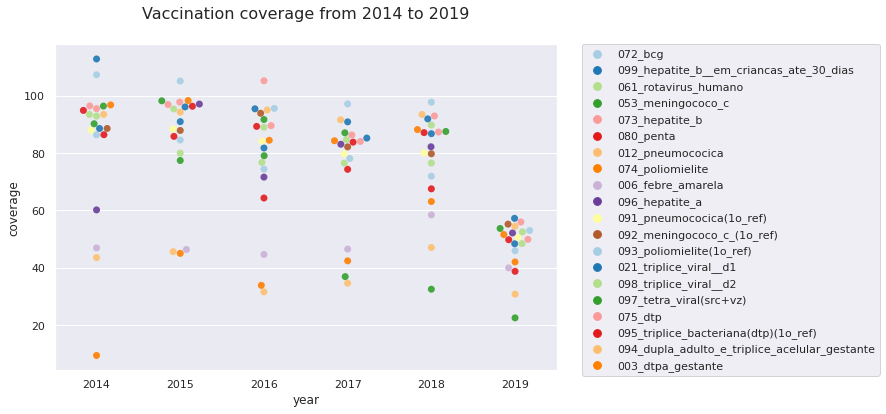

In [49]:
plt.figure(figsize=(9,6))

sns.swarmplot(data=vaccination_coverage_per_year_melt,
              x='year', y='coverage', hue='vaccine',
              palette=sns.color_palette("Paired", n_colors=20),
              s=7, alpha=0.9)

plt.title('Vaccination coverage from 2014 to 2019', 
          fontsize=16, y=1.06)

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0.)
plt.show()

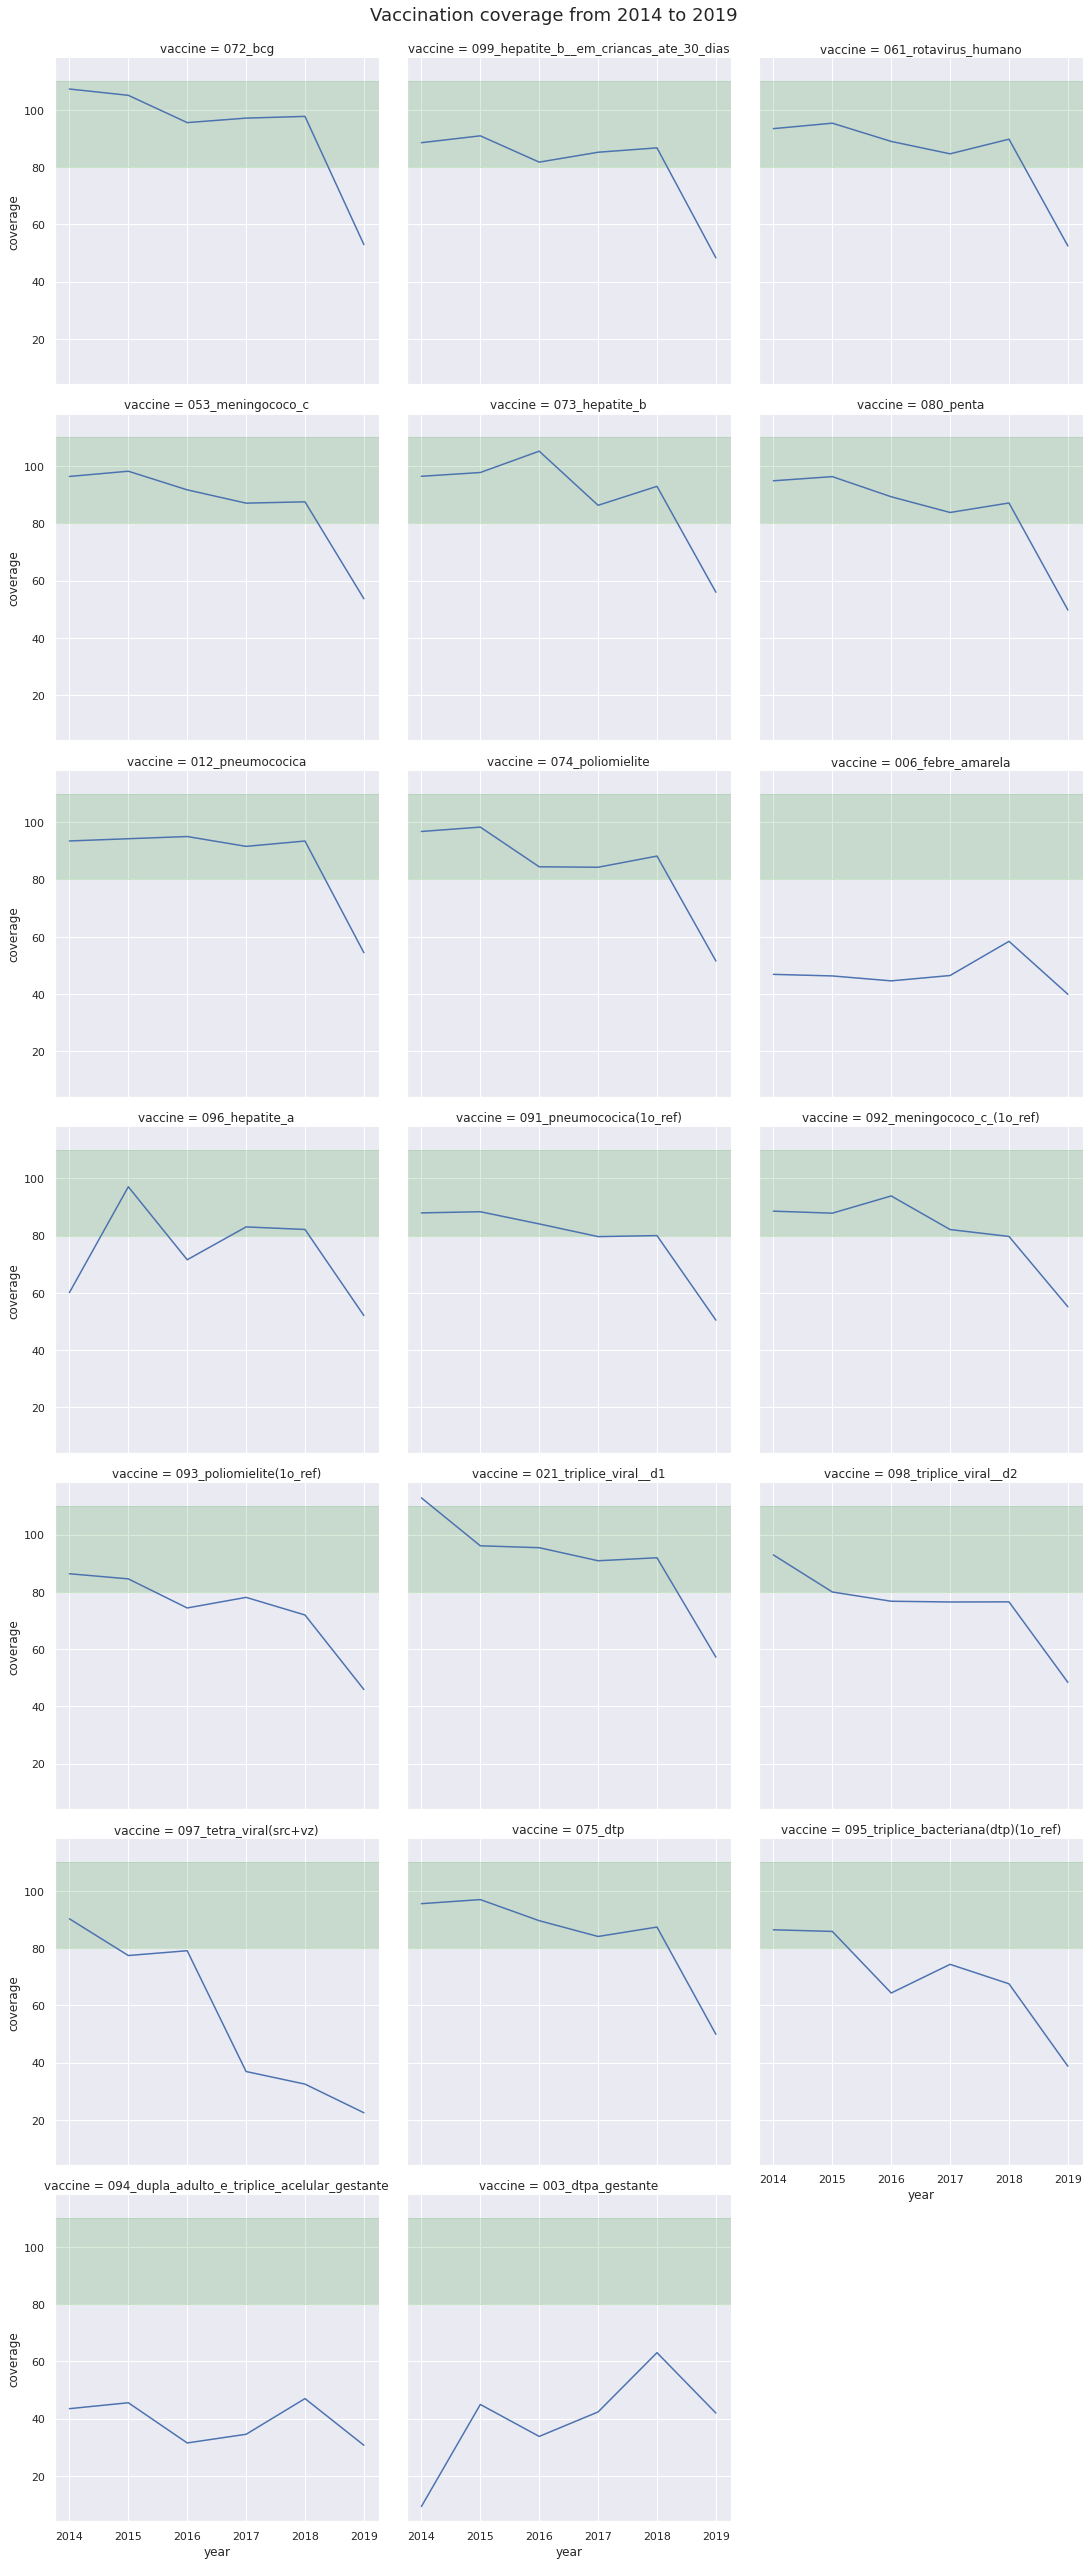

In [50]:
g = sns.relplot(data=vaccination_coverage_per_year_melt,
                x='year', y='coverage', kind='line',
                col='vaccine', col_wrap=3,
                palette='Paired')

g.fig.suptitle('Vaccination coverage from 2014 to 2019', 
               fontsize=18,
               x=0.5, y=1.01)

for ax in g.axes.flatten():
    ax.axhspan(ymin=80, ymax=110, 
               alpha=0.15, color='green')

plt.show()

**Insights:**

- **Vaccine coverage decreased in 2019 for all of them**. (Is the dataset updated for 2019?)


- As we see **12 vaccines had the coverage higher than 80% between 2014 and 2018**, they are: 'BCG', 'Hepatite B em crianças até 30 dias', 'Rotavirus Humano', 'Meningococo C', 'Hepatite B', 'Penta', 'Pneumococica', 'Poliomielite', 'Pneumococica (1o ref)', 'Meningococo c (1o ref)', 'Triplice Viral d1', 'DTP'.


- However, the others **8 vaccines had coverage of less than 80% in at least one year between 2014 and 2018**. These vaccines are: 'Febre Amarela', 'Hepatite A', 'Poliomielite(1o ref)', 'Triplice Viral d2',  'Tetra Viral (src+vz)', 'Triplice Bacteriana (dtp)(1o ref)', 'Dupla Adulto e Triplice Acelular Gestante', 'DTPA Gestante'.

In [51]:
vaccine_median_last_6_years = \
    vaccination_coverage_per_year \
        .median(axis=0) \
        [1:-1] \
        .sort_values(ascending=False)

vaccine_median_last_6_years

072_bcg                                          97.420
073_hepatite_b                                   94.665
021_triplice_viral__d1                           93.650
012_pneumococica                                 93.440
053_meningococo_c                                89.590
061_rotavirus_humano                             89.370
075_dtp                                          88.420
080_penta                                        88.185
074_poliomielite                                 86.300
099_hepatite_b__em_criancas_ate_30_dias          85.965
092_meningococo_c_(1o_ref)                       84.990
091_pneumococica(1o_ref)                         82.060
096_hepatite_a                                   76.870
098_triplice_viral__d2                           76.600
093_poliomielite(1o_ref)                         76.210
095_triplice_bacteriana(dtp)(1o_ref)             70.890
097_tetra_viral(src+vz)                          57.115
006_febre_amarela                               

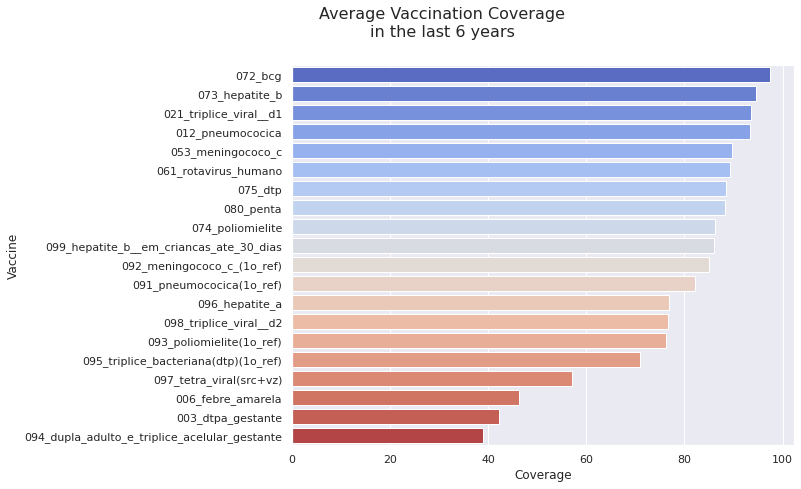

In [52]:
plt.figure(figsize=(9,7))

sns.barplot(x=vaccine_median_last_6_years.values,
            y=vaccine_median_last_6_years.index,
            palette='coolwarm')

plt.title('Average Vaccination Coverage\n'+
          'in the last 6 years',
          fontsize=16, x=0.3, y=1.06)
plt.xlabel('Coverage')
plt.ylabel('Vaccine')


plt.show()

**Insights:**

- On the graph above it's possible to see the average of the vaccine coverage in the last 6 years.


- **8 vaccines had a median coverage of less than 80%**. They are the same as the 8 vaccines that had coverage of less than 80% in at least one year between 2014 and 2018.


- BCG vaccine has the highest average vaccination covarege.


- Dupla Adulto e Triplice Acelular Gestante has the lowest average vaccination covarege.


---

## 7.2 Vaccination coverage per state and region in the last 6 years

In [53]:
state_vaccination_coverage_per_year_drop_total = \
    state_vaccination_coverage_per_year \
        .drop('total', axis=1)

state_vaccination_coverage_per_year_melt = \
    state_vaccination_coverage_per_year_drop_total \
        .melt(id_vars=['state', 'region'],
              value_name='coverage',
              var_name='year')

state_vaccination_coverage_per_year_melt.head()

,state,region,year,coverage
0,Rondônia,north,2014,98.18
1,Acre,north,2014,59.29
2,Amazonas,north,2014,77.14
3,Roraima,north,2014,82.30
4,Pará,north,2014,71.71


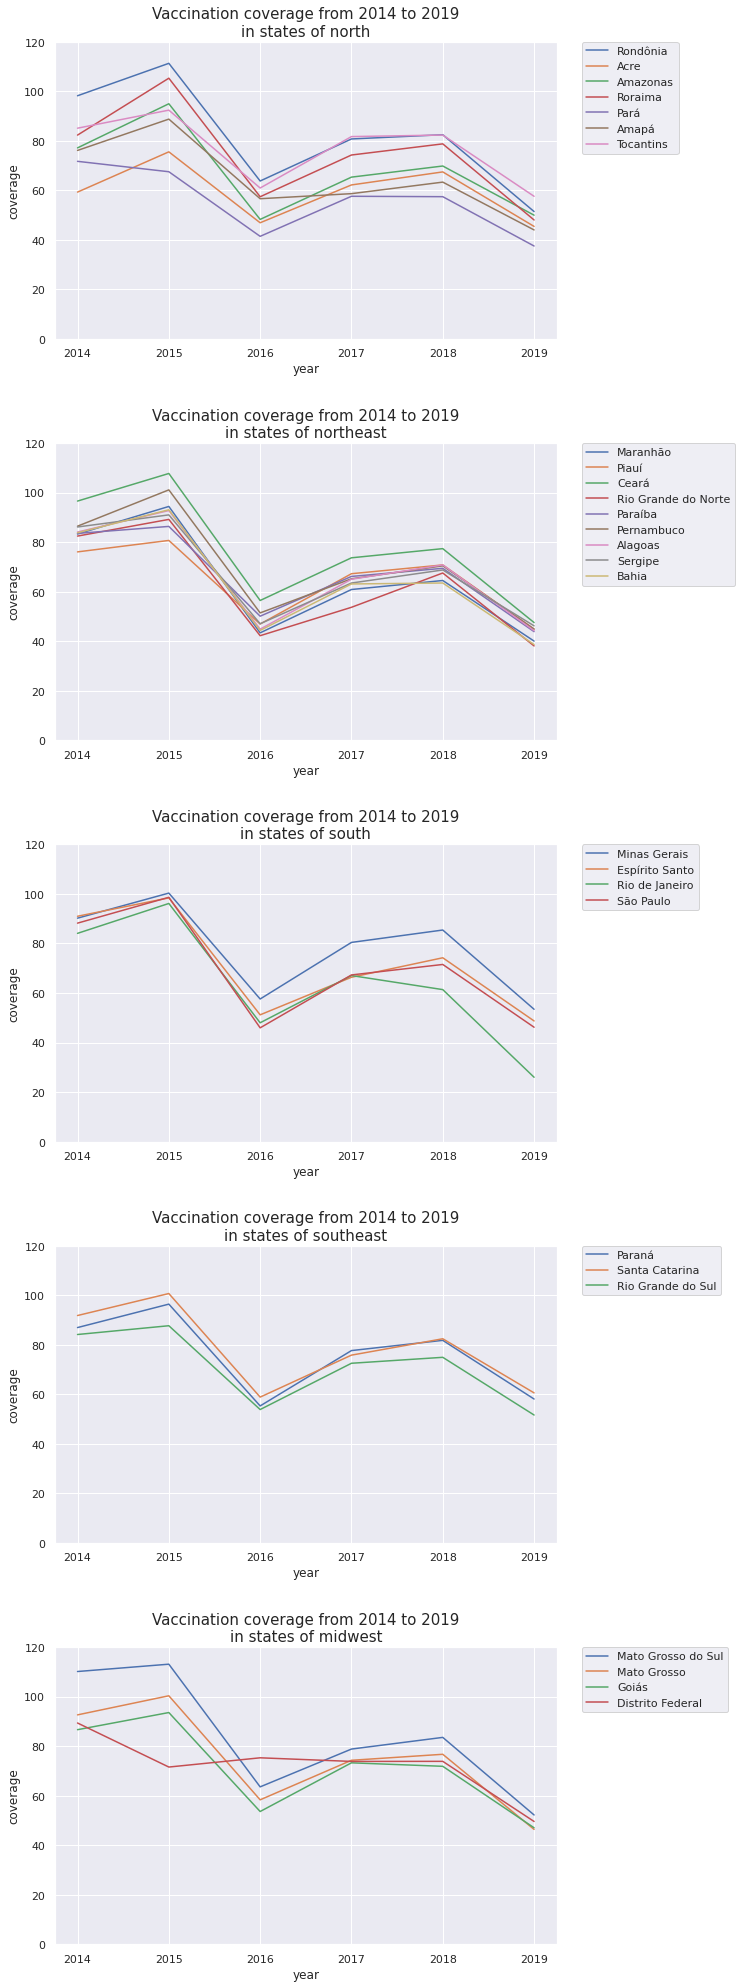

In [54]:
fig, axis = plt.subplots(5,1, figsize=(9,35))

regions = state_vaccination_coverage_per_year_melt['region'].unique()

i = 0

for region in regions:
        
    axis[i].set_title('Vaccination coverage from 2014 to 2019\n'+
                      f'in states of {region}', fontsize=15) 
    
    sns.lineplot(data=state_vaccination_coverage_per_year_melt \
                         [state_vaccination_coverage_per_year_melt.region == region],
                 x='year', y='coverage', hue='state', ax=axis[i])
    
    axis[i].legend(bbox_to_anchor=(1.05, 1), 
                   loc='upper left', borderaxespad=0.)
    
    axis[i].set_ylim(ymin=0, ymax=120)
    
    i = i+1
    
    
plt.subplots_adjust(hspace = 0.35)

plt.show()

**Insights:**

- In general, states have the same shape as the vaccination coverage line over the years, except Distrito Federal, which has different vaccine coverage from the others in 2015 and 2016.


- In the Northeast and North there are some states with lower vaccination coverage when compared to the other regions.


- In 2015 the vaccine coverage increased for almost all states (except in Para and Distrito Federal).


- In 2016 the vaccine coverage decreased for all states (except in Distrito Federal).


- In 2017 the vaccine coverage increased (compared to 2016) for almost all states (except in Distrito Federal).


- Are the increase and decrease in vaccination coverage (respectively in 2015 and 2016) related to the budget for the marketing campaign?

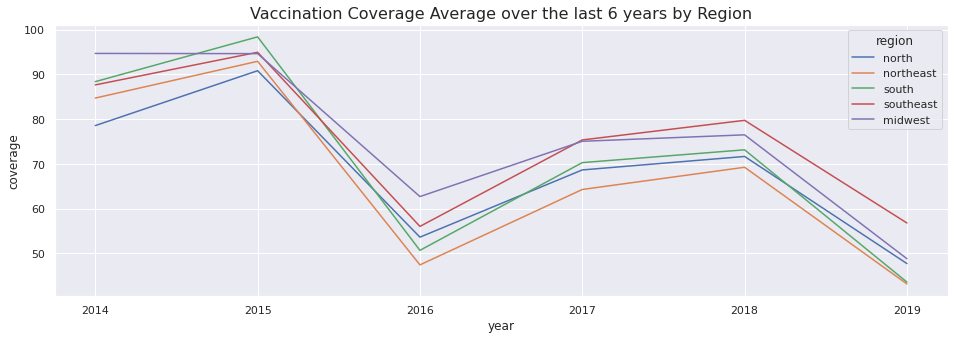

In [55]:
plt.figure(figsize=(16,5))
    
sns.lineplot(data=state_vaccination_coverage_per_year_melt,
             x='year', y='coverage', hue='region', ci=None)

plt.title('Vaccination Coverage Average over the last 6 years by Region',
          fontsize=16)

plt.show()

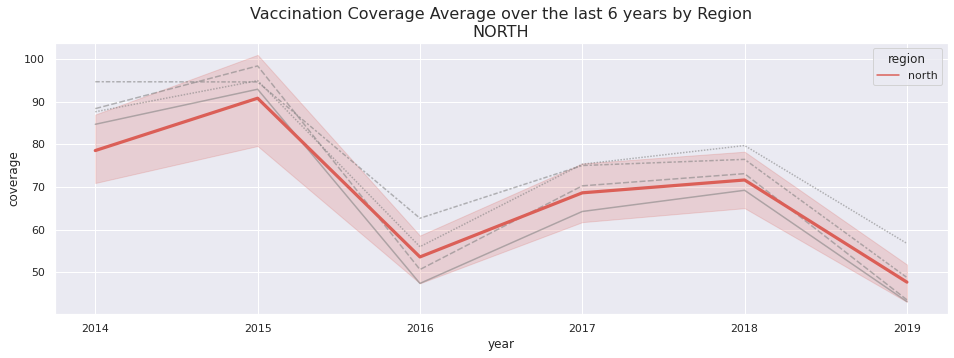

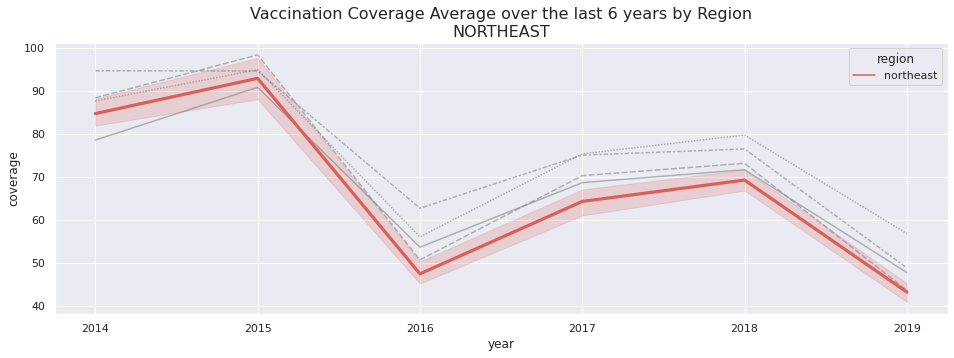

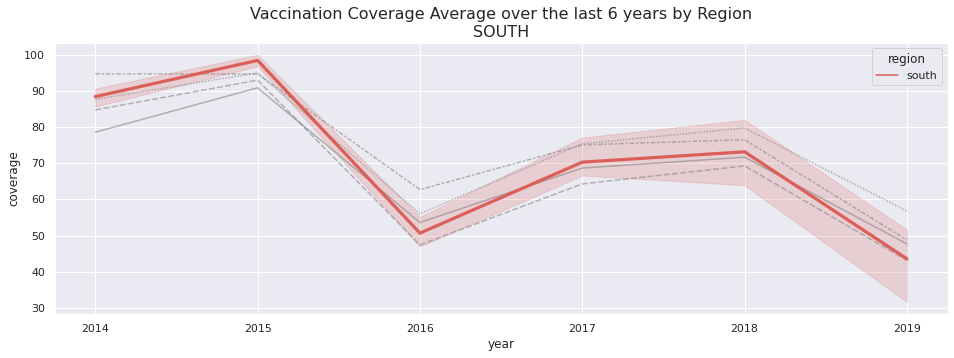

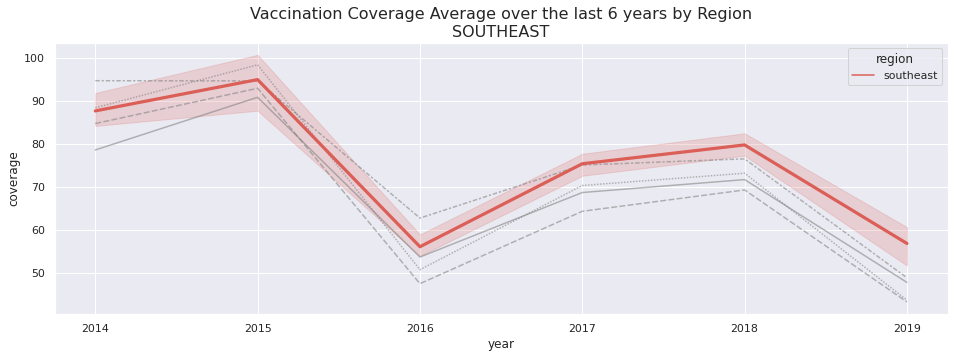

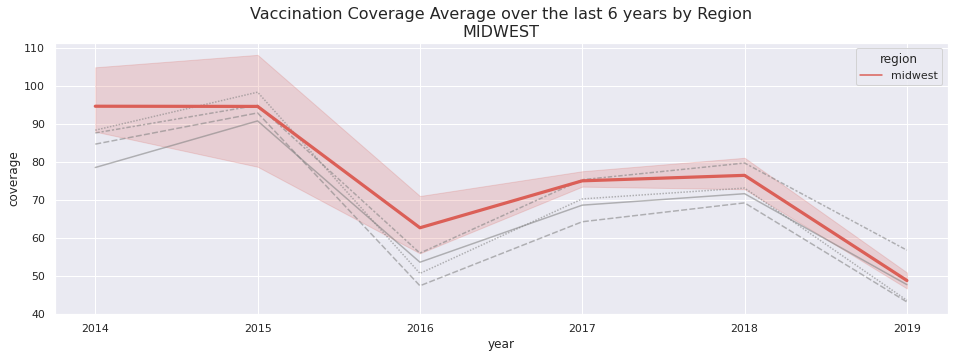

In [128]:
colors = ['grey', 'grey', 'grey', 'grey']

for region in regions:
    plt.figure(figsize=(16,5))
    
    plt.title('Vaccination Coverage Average over the last 6 years by Region\n'+
              region.upper(),
              fontsize=16)
    
    sns.lineplot(data=state_vaccination_coverage_per_year_melt \
                         [state_vaccination_coverage_per_year_melt.region != region],
                 x='year', y='coverage', hue='region', ci=None,
                 palette=colors, alpha=0.56, legend=False,
                 style='region')

    sns.lineplot(data=state_vaccination_coverage_per_year_melt \
                         [state_vaccination_coverage_per_year_melt.region == region],
                 x='year', y='coverage', hue='region',
                 palette='hls', linewidth=3.2)
    
    plt.show()

    
plt.show()

**Insights:**

- In general, the Northeast and North regions have a lower median vaccination coverage when compared to the other regions.


- In the Midwest and Southeast regions have a higher median vaccination coverage when compared to the other regions.


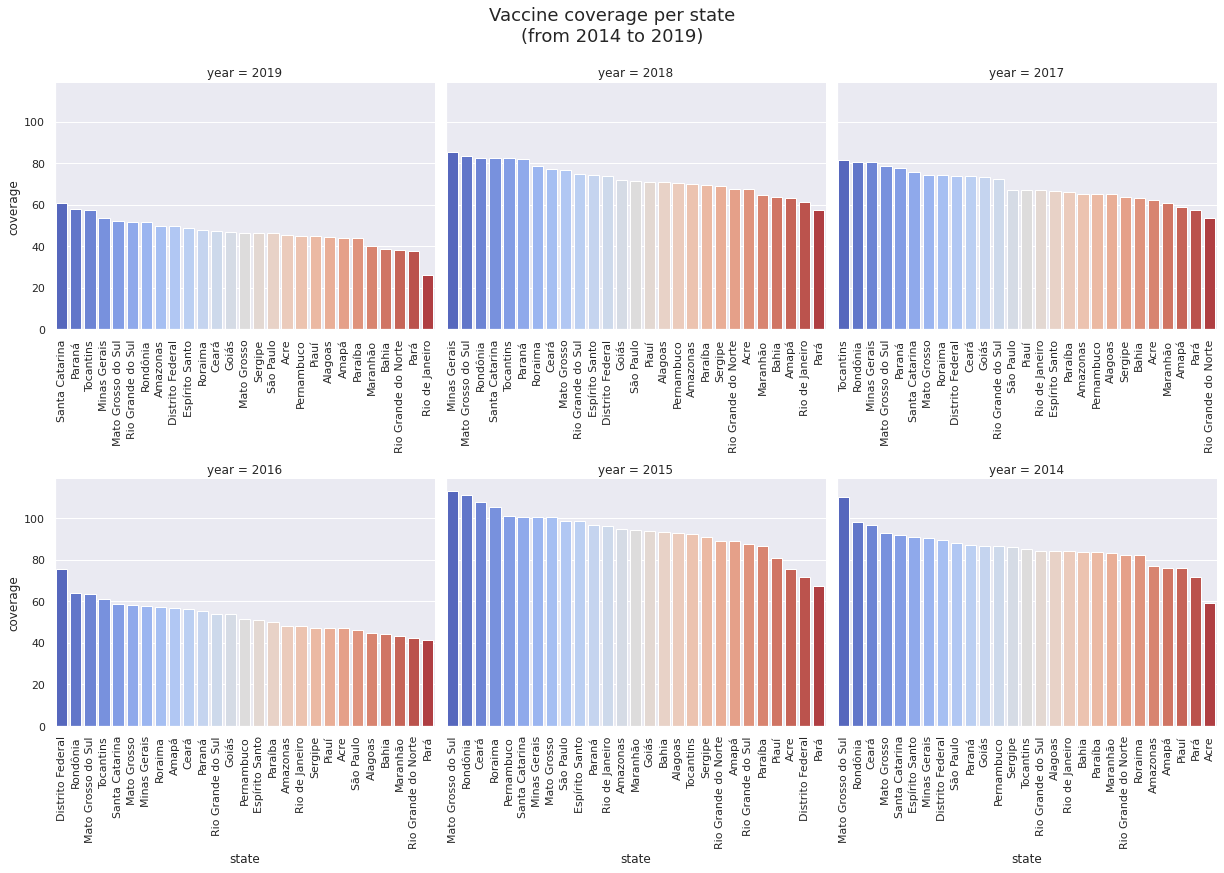

In [57]:
g = sns.catplot(data=state_vaccination_coverage_per_year_melt \
                        .sort_values(['year', 'coverage'], 
                                     ascending=False),
                x='state', y='coverage', kind='bar',
                col='year', col_wrap=3,
                palette='coolwarm', sharex=False, 
                color='green', height=5.7)

g.fig.suptitle('Vaccine coverage per state\n'+
               '(from 2014 to 2019)', 
               fontsize=18,
               x=0.5, y=1.06)

g.set_xticklabels(rotation=90)
g.fig.tight_layout()

plt.show()

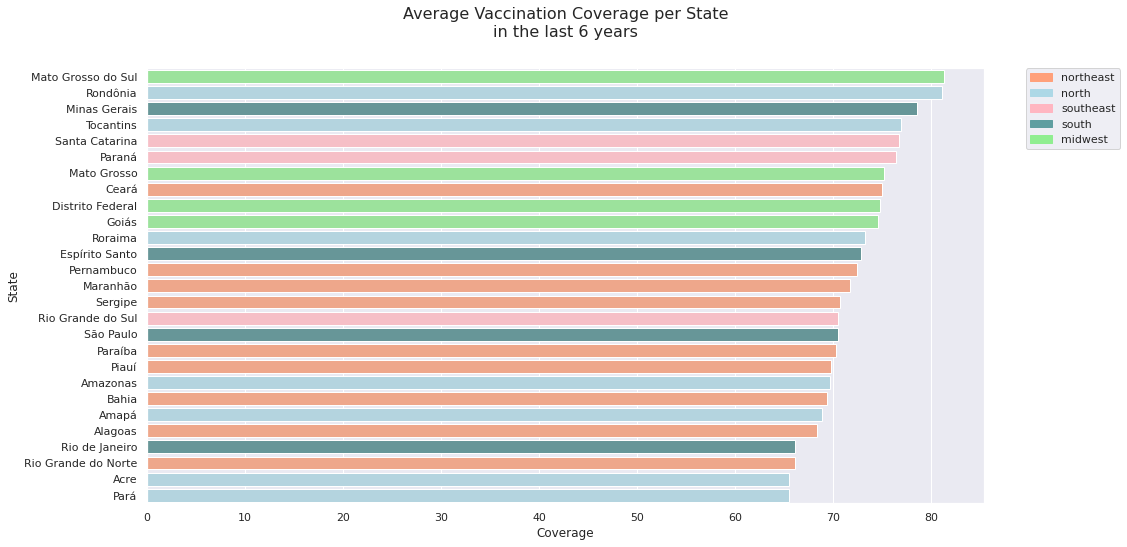

In [162]:
colors = state_vaccination_coverage_per_year \
            .copy() \
            .sort_values('total', ascending=False) \
            .region \
            .replace('midwest', 'lightgreen') \
            .replace('north', 'lightblue') \
            .replace('south', 'cadetblue') \
            .replace('northeast', 'lightsalmon') \
            .replace('southeast', 'lightpink') \
            .to_list()

plt.figure(figsize=(15,8))


sns.barplot(data=state_vaccination_coverage_per_year \
                    .sort_values('total', ascending=False),
            x='total', y='state',
            palette=colors)


plt.title('Average Vaccination Coverage per State\n'+
          'in the last 6 years',
          fontsize=16, x=0.5, y=1.06)
plt.xlabel('Coverage')
plt.ylabel('State')


colors_dict = {'Northeast':'lightsalmon', 'North': 'lightblue', 
               'Southeast':'lightpink', 'South': 'cadetblue',
               'Midwest': 'lightgreen'}    
labels = list(colors_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0.)

plt.show()

**Insights:**

- Pará and Acre (from North of Brazil) have the worst average vaccination coverage in the last 6 years.


- From 2014 to 2019 Pará was the last or second to last state on the list with the highest vaccination coverage.


- Rio de Janeiro is the only state outside the North or Northeast regions that has an average vaccination coverage of less than 70%.


- Mato Grosso do Sul has the highest average vaccination coverage.


---

## 7.3 Vaccination coverage for each vaccine in states of Brazil

In [58]:
vaccination_coverage_per_state_drop_total = \
    vaccination_coverage_per_state \
        .drop('total', axis=1)

vaccination_coverage_per_state_melt = \
    vaccination_coverage_per_state_drop_total \
        .melt(id_vars=['state', 'region'],
              value_name='coverage',
              var_name='vaccine')

vaccination_coverage_per_state_melt = \
    vaccination_coverage_per_state_melt \
        .sort_values(['vaccine', 'coverage'], ascending=False) \
        .copy() \
        .reset_index(drop=True)
        
vaccination_coverage_per_state_melt

,state,region,vaccine,coverage
0,Distrito Federal,midwest,099_hepatite_b__em_criancas_ate_30_dias,92.93
1,Sergipe,northeast,099_hepatite_b__em_criancas_ate_30_dias,82.58
2,Mato Grosso do Sul,midwest,099_hepatite_b__em_criancas_ate_30_dias,82.56
3,Roraima,north,099_hepatite_b__em_criancas_ate_30_dias,79.26
4,Rondônia,north,099_hepatite_b__em_criancas_ate_30_dias,77.44
...,...,...,...,...
535,Sergipe,northeast,003_dtpa_gestante,28.14
536,Bahia,northeast,003_dtpa_gestante,27.96
537,Piauí,northeast,003_dtpa_gestante,26.38
538,Acre,north,003_dtpa_gestante,20.42


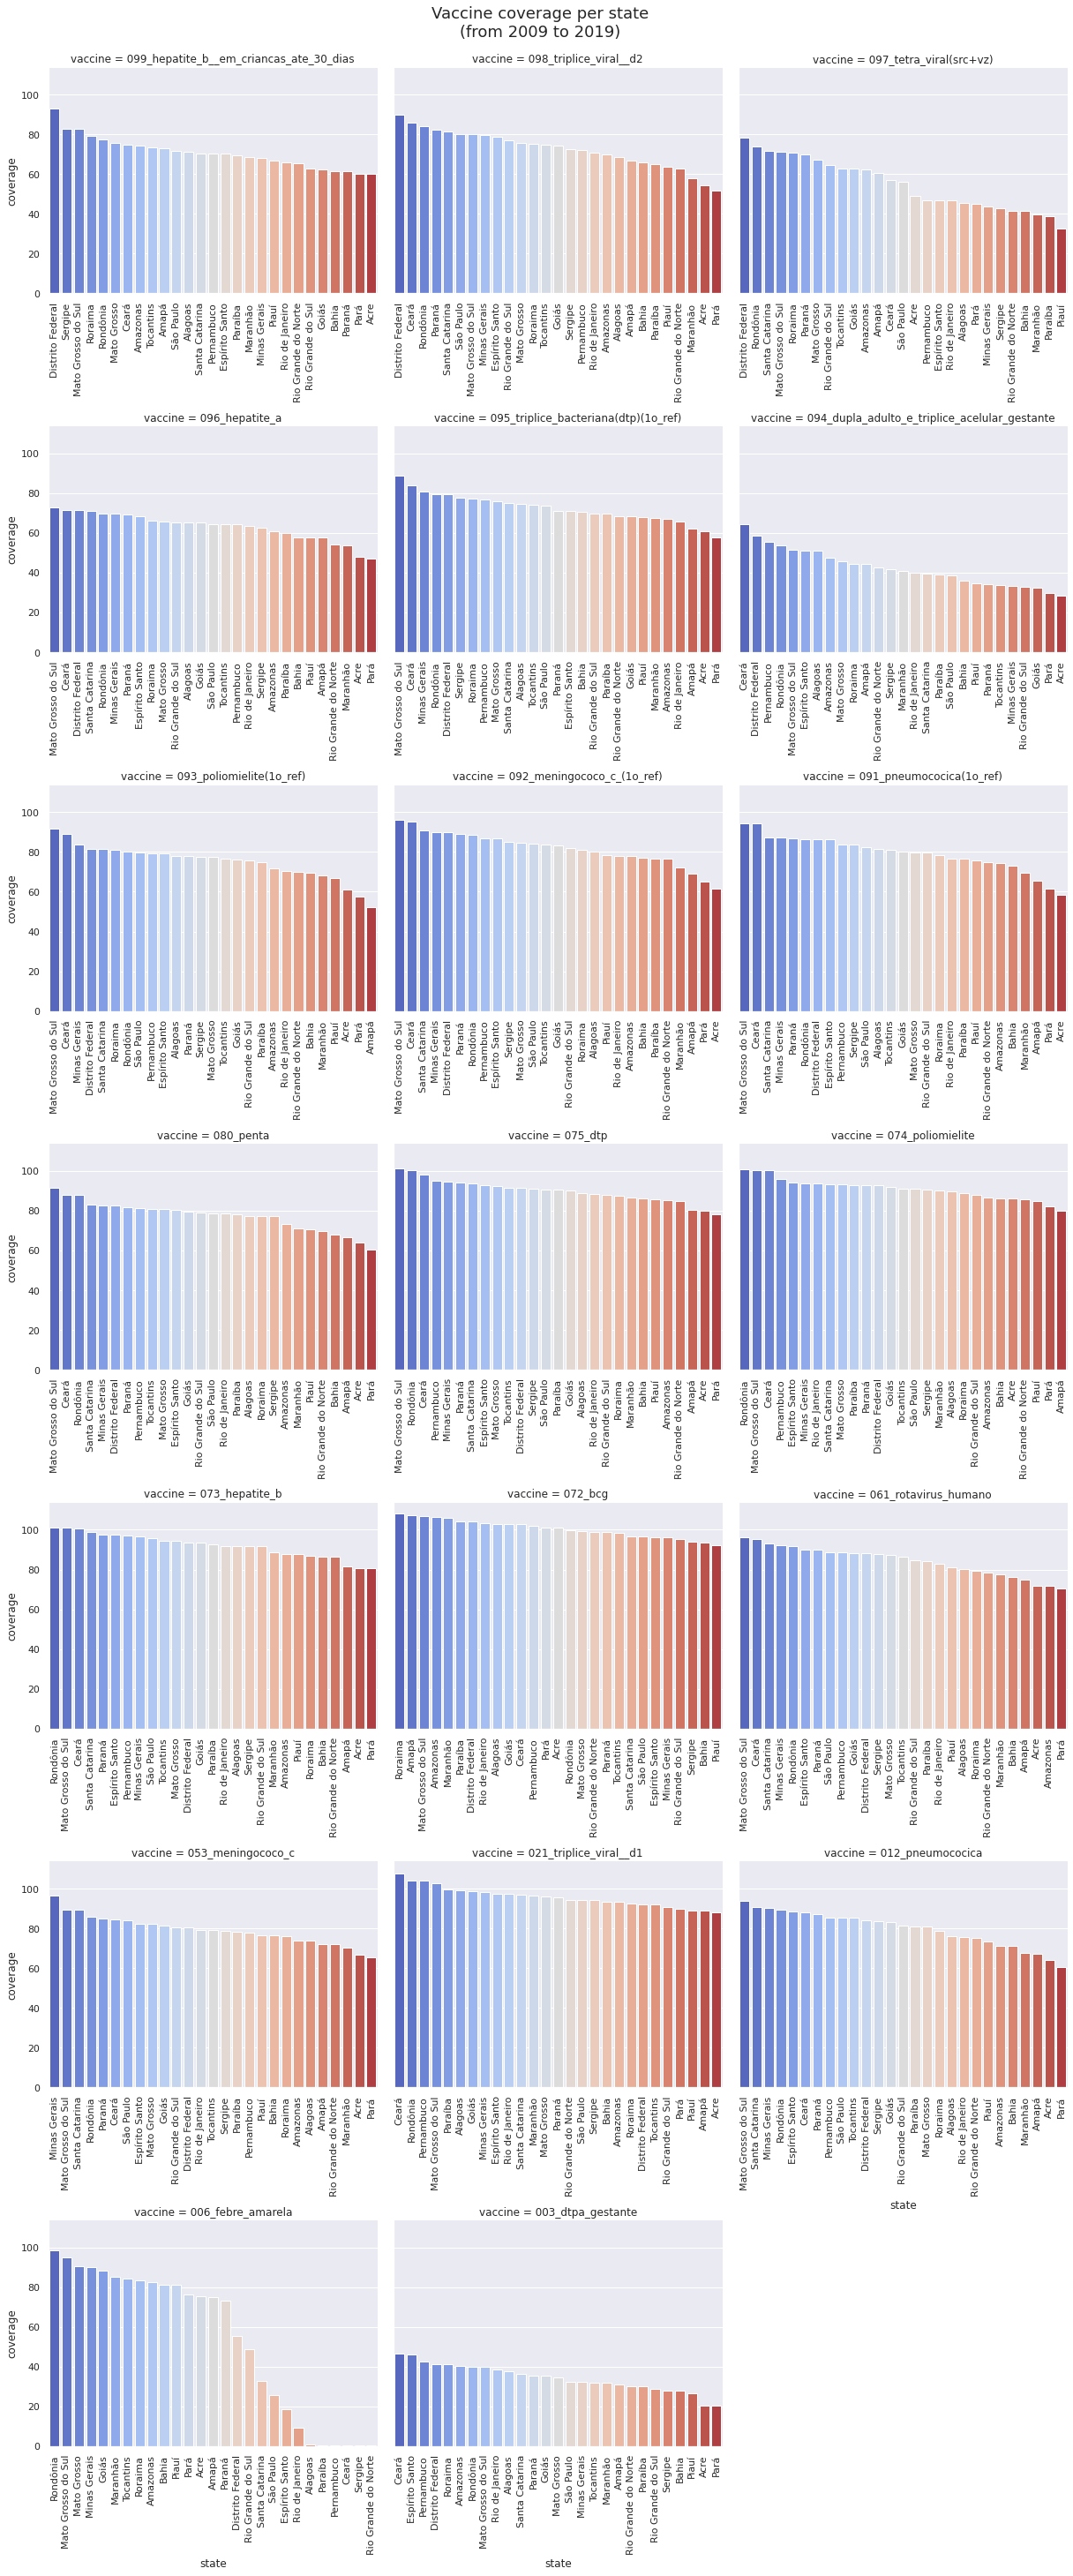

In [165]:
g = sns.catplot(data=vaccination_coverage_per_state_melt,
                x='state', y='coverage', kind='bar',
                col='vaccine', col_wrap=3,
                palette='coolwarm', sharex=False, 
                color='green', height=5.7)

g.fig.suptitle('Vaccine coverage per state\n'+
               '(from 2009 to 2019)', 
               fontsize=18,
               x=0.5, y=1.015)

g.set_xticklabels(rotation=90)
g.fig.tight_layout()

plt.show()

**Insights:**

- Vaccines like Tetra Viral, Dupla Adulto e Triplice Acelular Gestante, Hepatite A, and DTPA Gestante have a low vaccination coverage between 2009 and 2019 in the most of states in Brazil.


- Febre Amarela vaccine has the vaccination coverage between 2009 and 2019 lower than 40% in 10 states. They are: Santa Catarina, São Paulo, Espírito Santo, Rio de Janeiro, Alagoas, Paraíba, Pernambuco, Ceará, Sergipe, and Rio Grande do Norte.


---

## 7.4 Analysis _Conclusion_

### Vaccination coverage for each vaccine in the last 6 years

**Insights:**

- **Vaccine coverage decreased in 2019 for all of them**. (Is the dataset updated for 2019?)


- As we see **12 vaccines had the coverage higher than 80% between 2014 and 2018**, they are: 'BCG', 'Hepatite B em crianças até 30 dias', 'Rotavirus Humano', 'Meningococo C', 'Hepatite B', 'Penta', 'Pneumococica', 'Poliomielite', 'Pneumococica (1o ref)', 'Meningococo c (1o ref)', 'Triplice Viral d1', 'DTP'.


- However, the others **8 vaccines had coverage of less than 80% in at least one year between 2014 and 2018**. These vaccines are: 'Febre Amarela', 'Hepatite A', 'Poliomielite(1o ref)', 'Triplice Viral d2',  'Tetra Viral (src+vz)', 'Triplice Bacteriana (dtp)(1o ref)', 'Dupla Adulto e Triplice Acelular Gestante', 'DTPA Gestante'.


- **8 vaccines had a median coverage of less than 80%**. They are the same as the 8 vaccines that had coverage of less than 80% in at least one year between 2014 and 2018.


- BCG vaccine has the highest average vaccination covarege.


- Dupla Adulto e Triplice Acelular Gestante has the lowest average vaccination covarege.


### Vaccination coverage per state and region in the last 6 years

**Insights:**

- In general, states have the same shape as the vaccination coverage line over the years, except Distrito Federal, which has different vaccine coverage from the others in 2015 and 2016.


- In the **Northeast and North there are some states with lower vaccination coverage** when compared to the other regions.


- **In 2015 the vaccine coverage increased** for almost all states (except in Para and Distrito Federal).


- **In 2016 the vaccine coverage decreased** for all states (except in Distrito Federal).


- **In 2017 the vaccine coverage increased (compared to 2016)** for almost all states (except in Distrito Federal).
    - Are the increase and decrease in vaccination coverage (respectively in 2015 and 2016) related to the budget for the marketing campaign?


- In general, **the Northeast and North regions have a lower median vaccination coverage** when compared to the other regions.


- In **the Midwest and Southeast regions have a higher median vaccination coverage** when compared to the other regions.


- **Pará and Acre (from North of Brazil) have the worst average vaccination coverage** in the last 6 years.


- From 2014 to 2019 **Pará was the last or second to last state on the list with the highest vaccination coverage**.


- **Rio de Janeiro is the only state outside the North or Northeast regions that has an average vaccination coverage of less than 70%**.


- **Mato Grosso do Sul has the highest average vaccination coverage**.



### Vaccination coverage for each vaccine in states of Brazil

**Insights:**

- **Vaccines like Tetra Viral, Dupla Adulto e Triplice Acelular Gestante, Hepatite A, and DTPA Gestante have a low vaccination coverage between 2009 and 2019 in the most of states in Brazil**.


- **Febre Amarela vaccine has the vaccination coverage between 2009 and 2019 lower than 40% in 10 states**. They are: Santa Catarina, São Paulo, Espírito Santo, Rio de Janeiro, Alagoas, Paraíba, Pernambuco, Ceará, Sergipe, and Rio Grande do Norte.


---